In [14]:
import pandas as pd
import numpy as np

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
def remove_zero_columns(data):
    for column in data.columns:
        if column == 'label':
            continue
        if data[column].sum() == 0:
            data.drop(column, axis=1, inplace=True)
    return data

In [17]:
dominant_color = pd.read_csv('dominant_colors.csv')
histogram = pd.read_csv('histograms.csv')
texture = pd.read_csv('texture_features.csv')
labels = pd.read_csv('labels.csv')
shapes = pd.read_csv('shape_features.csv')

import random
random.seed(42)
random_10 = random.sample(list(labels['label'].unique()), 10)
random_20 = random.sample(list(labels['label'].unique()), 20)

In [18]:
def results(y_pred, y_test, labels):
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: ', accuracy)
    precision = precision_score(y_test, y_pred, average='weighted')
    print('Precision: ', precision)
    recall = recall_score(y_test, y_pred, average='weighted')
    print('Recall: ', recall)

    conf_matrix = confusion_matrix(y_test, y_pred)
    true_positive = np.diag(conf_matrix)
    print('True Positive: ', true_positive)

    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='g')  # 'g' format ensures that integers are displayed properly

    # Setting labels, title and ticks
    plt.ylabel('Actual', fontsize=12)
    plt.title('Confusion Matrix', fontsize=15)
    plt.xticks(np.arange(len(labels)) + 0.5, labels, rotation=45, ha='right')  # Adjust tick positions and labels
    plt.yticks(np.arange(len(labels)) + 0.5, labels, rotation=0)

# SVM 10 Class

Accuracy:  0.366
Precision:  0.36713462936750707
Recall:  0.366
True Positive:  [32 35 45 39 29 17 40 58 31 40]


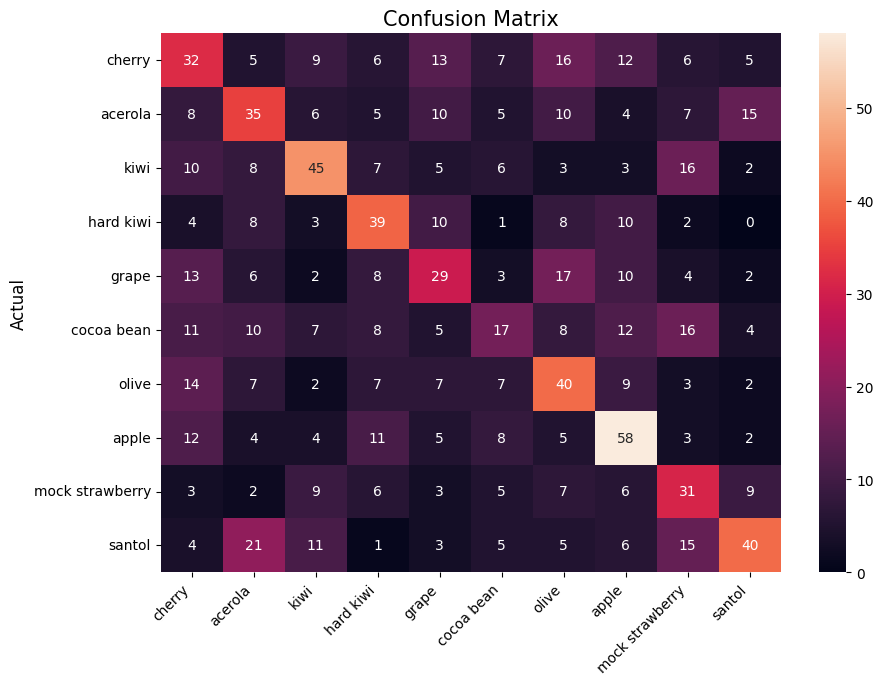

In [19]:


data_svm = pd.concat([texture,dominant_color,histogram, shapes,labels], axis=1)
data_svm = data_svm[data_svm['label'].isin(random_10)]
data_svm = remove_zero_columns(data_svm)

#train svm model
from sklearn import svm
from sklearn.model_selection import train_test_split

X = data_svm.drop('label', axis=1)
y = data_svm['label']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = svm.SVC(kernel='rbf', C=100, gamma='auto')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

results(y_pred, y_test, random_10)

# SVM 20 Class

Accuracy:  0.27
Precision:  0.2805036233029726
Recall:  0.27
True Positive:  [48 22 29 13 32 26 35 17 13 39 24 26 16 21 20 21 46 32 28 32]


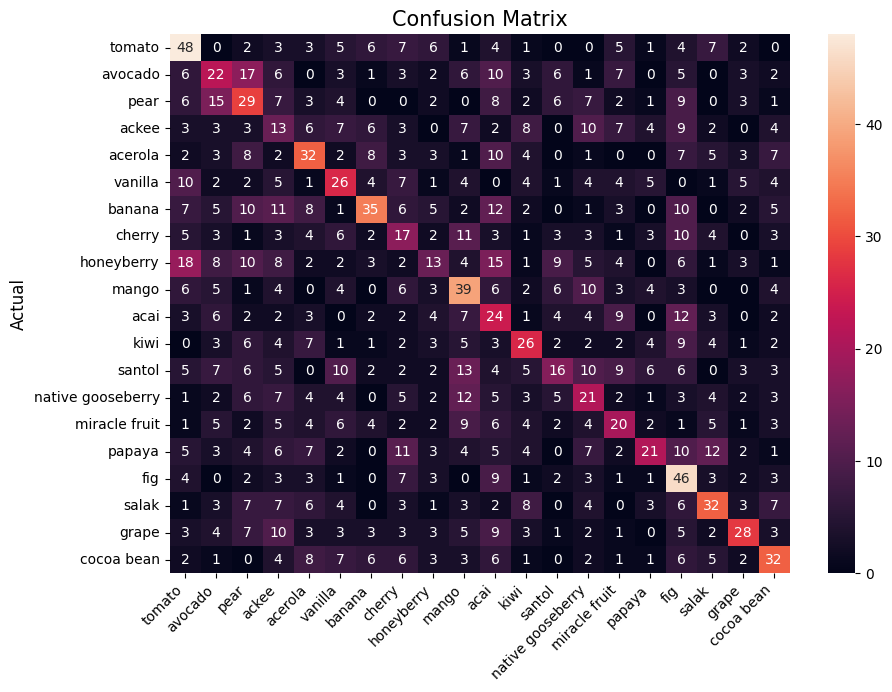

In [27]:
data_svm = pd.concat([texture,dominant_color,histogram, shapes,labels], axis=1)
data_svm = data_svm[data_svm['label'].isin(random_20)]
data_svm = remove_zero_columns(data_svm)

#train svm model
from sklearn import svm
from sklearn.model_selection import train_test_split

X = data_svm.drop('label', axis=1)
y = data_svm['label']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = svm.SVC(kernel='rbf', C=100, gamma='auto')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

results(y_pred, y_test, random_20)

# RANDOM FOREST with 20 Class

Accuracy:  0.2805
Precision:  0.2818786463631781
Recall:  0.2805
True Positive:  [46 18 20  5 25 27 49 29 23 43 18 30 29 30 22 13 48 27 29 30]


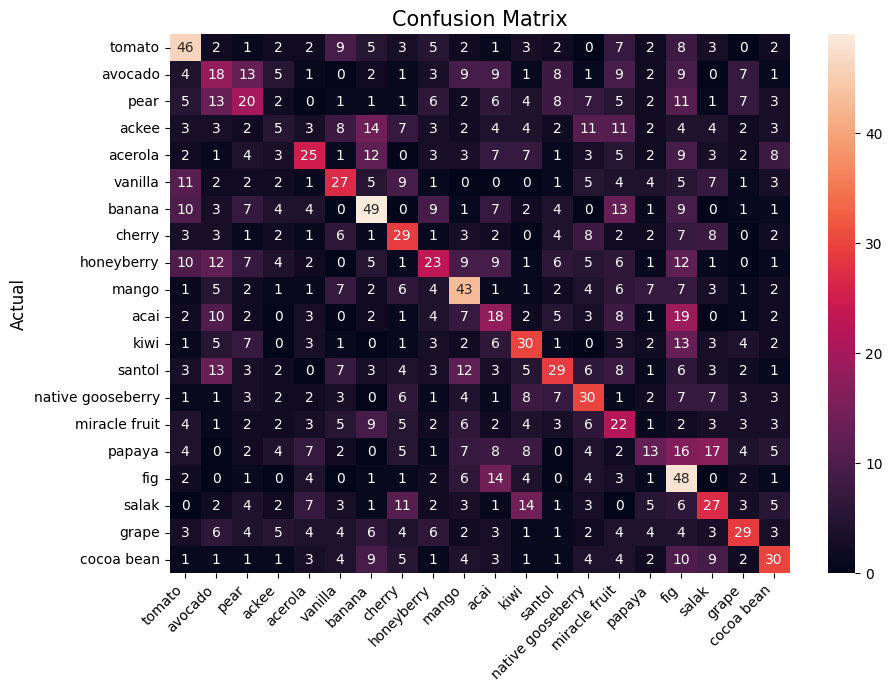

In [21]:
#train random forest model
from sklearn.ensemble import RandomForestClassifier

data_rf = pd.concat([texture,dominant_color,histogram, shapes,labels], axis=1)
data_rf = data_rf[data_rf['label'].isin(random_20)]

data_rf = remove_zero_columns(data_rf)
data_rf.dropna(inplace=True)

X = data_rf.drop('label', axis=1)
y = data_rf['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=3000, max_depth=25, random_state=42, criterion='gini', 
                             min_samples_split=2, min_samples_leaf=5, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

results(y_pred, y_test, random_20)

# RANDOM FOREST with 10 class

Accuracy:  0.388
Precision:  0.3905642979755899
Recall:  0.388
True Positive:  [29 41 44 54 31 23 33 58 27 48]


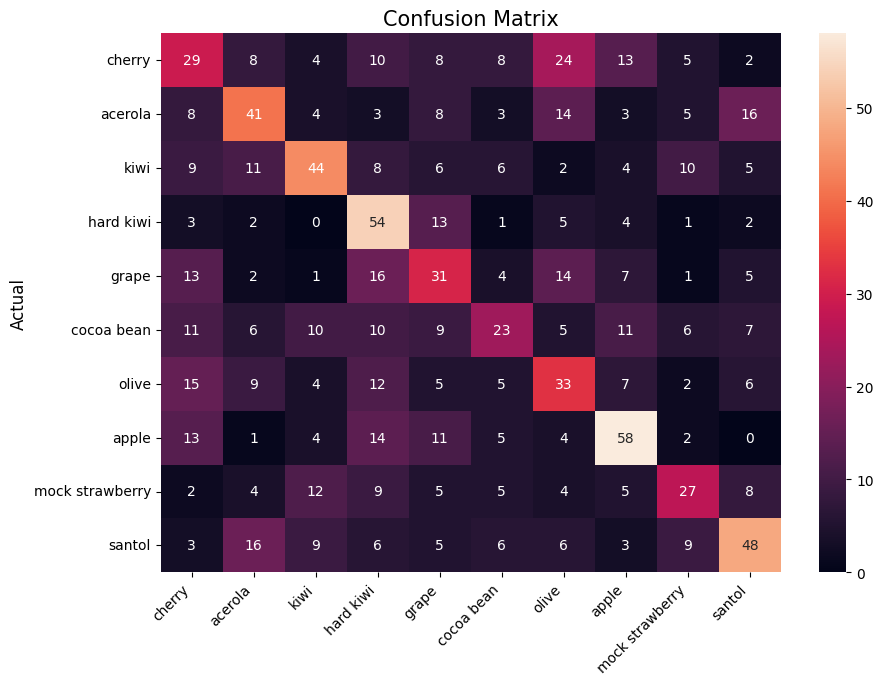

In [22]:
#train random forest model
from sklearn.ensemble import RandomForestClassifier

data_rf = pd.concat([texture,dominant_color,histogram, shapes,labels], axis=1)

data_rf = data_rf[data_rf['label'].isin(random_10)]

data_rf = remove_zero_columns(data_rf)
data_rf.dropna(inplace=True)

X = data_rf.drop('label', axis=1)
y = data_rf['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=3000, max_depth=25, random_state=42, criterion='gini', 
                             min_samples_split=2, min_samples_leaf=5, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

results(y_pred, y_test, random_10)

# KNN 20 Class

Accuracy:  0.226
Precision:  0.23052927263087541
Recall:  0.226
True Positive:  [38 22 27  9 16 30 39 20 13 38 16 17 17 18 18 14 31 20 29 20]


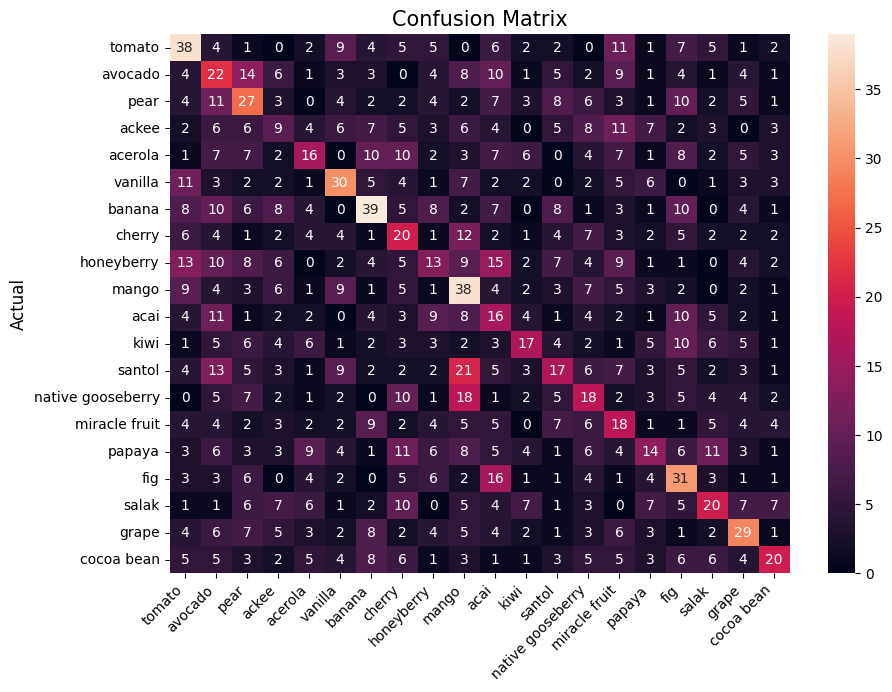

In [23]:
#train knn model
from sklearn.neighbors import KNeighborsClassifier

data_knn = pd.concat([texture,dominant_color,histogram, shapes,labels], axis=1)
data_knn = data_knn[data_knn['label'].isin(random_20)]
data_knn = remove_zero_columns(data_knn)

X = data_knn.drop('label', axis=1)
y = data_knn['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = KNeighborsClassifier(n_neighbors=20, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

results(y_pred, y_test, random_20)

# KNN 10 Class

Accuracy:  0.333
Precision:  0.33375377573647946
Recall:  0.333
True Positive:  [29 32 40 43 25 11 32 51 29 41]


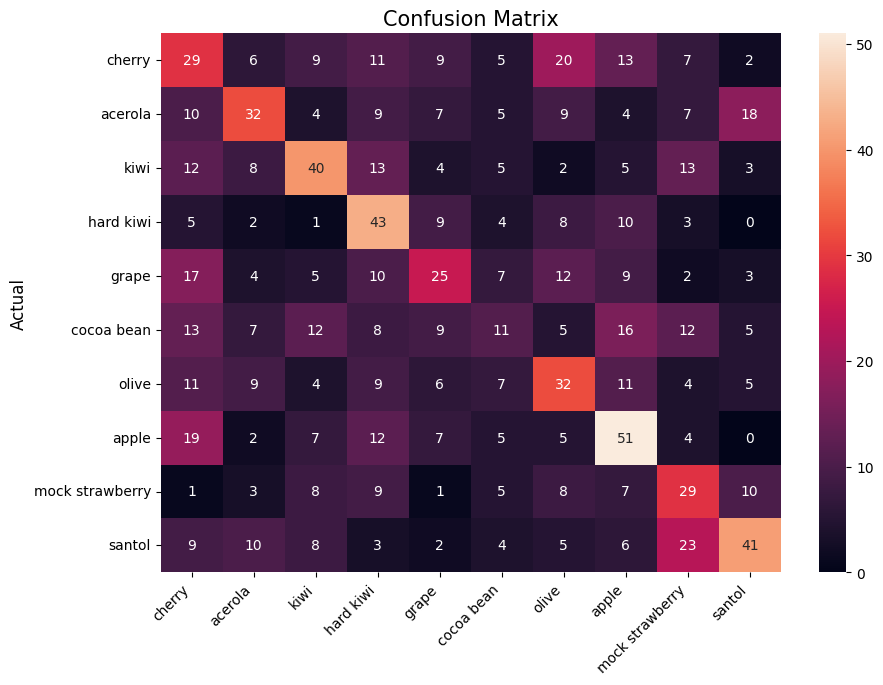

In [24]:
#train knn model
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

data_knn = pd.concat([texture,dominant_color,histogram, shapes,labels], axis=1)
data_knn = data_knn[data_knn['label'].isin(random_10)]
data_knn = remove_zero_columns(data_knn)

X = data_knn.drop('label', axis=1)
y = data_knn['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = KNeighborsClassifier(n_neighbors=20, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

results(y_pred, y_test, random_10)

# XGBOOST 20 Class

Accuracy:  0.271
Precision:  0.27021840940455677
Recall:  0.271
True Positive:  [54 22 28 14 24 22 38 31 19 31 20 27 25 28 21 17 29 20 32 40]


['xgb20_model.pkl']

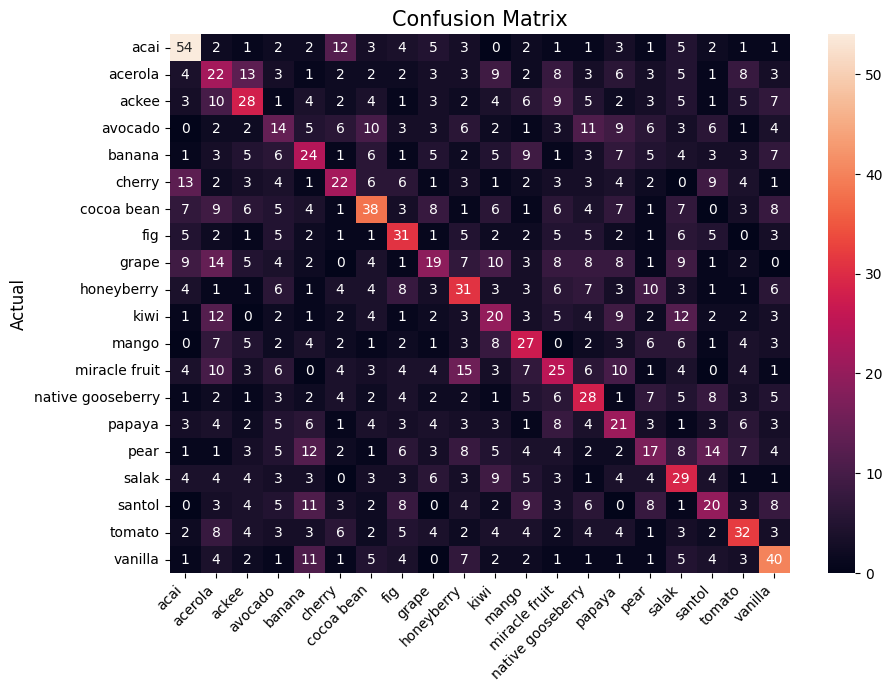

In [52]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

data_xgb = pd.concat([texture, dominant_color, histogram, shapes, labels], axis=1)
data_xgb = data_xgb[data_xgb['label'].isin(random_20)]
data_xgb = remove_zero_columns(data_xgb)

X = data_xgb.drop('label', axis=1)
y = data_xgb['label']
# Scaling features
xgb20_scaler = StandardScaler()
X = xgb20_scaler.fit_transform(X)

# Encoding labels
xgb20_label_encoder = LabelEncoder()
y_encoded = xgb20_label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

clf = XGBClassifier(n_estimators=3000, max_depth=25, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

labels_for_plot_xgb20 = xgb20_label_encoder.inverse_transform(sorted(np.unique(y_test)))
results(y_pred, y_test, labels_for_plot_xgb20)

#save models
import joblib

joblib.dump(clf, 'xgb20_model.pkl')

# XGBOOST 10 Class

Accuracy:  0.385
Precision:  0.3878147720550067
Recall:  0.385
True Positive:  [33 39 49 47 32 28 28 50 33 46]


['xgb10_model.pkl']

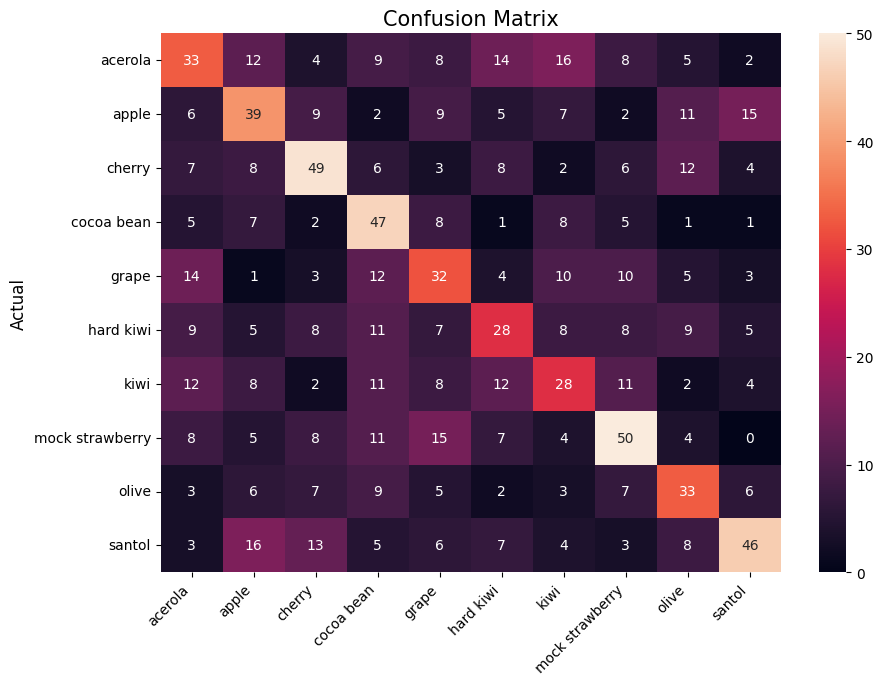

In [53]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

data_xgb = pd.concat([texture, dominant_color, histogram, shapes, labels], axis=1)
data_xgb = data_xgb[data_xgb['label'].isin(random_10)]
data_xgb = remove_zero_columns(data_xgb)

X = data_xgb.drop('label', axis=1)
y = data_xgb['label']

# Scaling features
xgb10_scaler = StandardScaler()
X = xgb10_scaler.fit_transform(X)

# Encoding labels
xgb10_label_encoder = LabelEncoder()
y_encoded = xgb10_label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

clf = XGBClassifier(n_estimators=3000, max_depth=25, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

labels_for_plot_xgb10 = xgb10_label_encoder.inverse_transform(sorted(np.unique(y_test)))
results(y_pred, y_test, labels_for_plot_xgb10)

#save models
import joblib

joblib.dump(clf, 'xgb10_model.pkl')

In [55]:
xgb_10 = joblib.load('xgb10_model.pkl')
xgb_20 = joblib.load('xgb20_model.pkl')

#load batch features
batch_df = pd.read_csv('batch_features.csv')
batch_df = remove_zero_columns(batch_df)

In [56]:
batch_df.head(3)

,mean_lbp,var_lbp,H,S,V,0,2,Area,Perimeter,Aspect Ratio,Extent,Solidity,label,path
0,7.936114,0.519979,0,7,4,0.008166,0.991834,20.032338,84.691378,1.097249,0.099400,0.244451,cocoa bean,cocoa bean\821.jpg
1,7.934769,0.517595,1,7,4,0.008154,0.991846,14.644986,94.288563,1.055333,0.037515,0.141314,cocoa bean,cocoa bean\822.jpg
2,7.939136,0.484108,0,0,7,0.007621,0.992379,24.966203,94.148187,1.172223,0.084677,0.216357,cocoa bean,cocoa bean\823.jpg


In [58]:
#predict using xgb_10 model
X = batch_df.drop(['label', 'path'], axis=1)
y = batch_df['label']
xgb_10_X = xgb10_scaler.transform(X)
xgb_10_y = xgb10_label_encoder.transform(y)

xgb10_y_pred = xgb_10.predict(xgb_10_X)

#predict using xgb_20 model
xgb_20_X = xgb20_scaler.transform(X)
xgb_20_y = xgb20_label_encoder.transform(y)

xgb20_y_pred = xgb_20.predict(xgb_20_X)

In [67]:
results_df = pd.DataFrame({'xgb_10': xgb10_y_pred,  'actual_10': xgb_10_y, 'xgb_20': xgb20_y_pred, 'actual_20' : xgb_20_y , 'path': batch_df['path']})

In [69]:
results_df.head(20)

,xgb_10,actual_10,xgb_20,actual_20,path
0,3,3,6,6,cocoa bean\821.jpg
1,3,3,3,6,cocoa bean\822.jpg
2,3,3,6,6,cocoa bean\823.jpg
3,3,3,6,6,cocoa bean\824.jpg
4,3,3,6,6,cocoa bean\829.jpg
5,3,3,6,6,cocoa bean\832.jpg
6,3,3,6,6,cocoa bean\835.jpg
7,3,3,6,6,cocoa bean\836.jpg
8,3,3,6,6,cocoa bean\837.jpg
9,3,3,6,6,cocoa bean\838.jpg


As we can see, the better model is the XGBOOST with 10 classes. XGBOOST with 20 classes model has tend to predict another class.

True predicted with both xgb_10 and xgb_20 
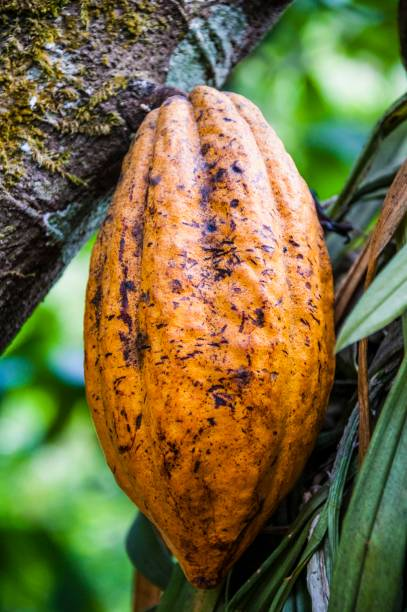 

---------------------------------------

False predicted with xgb_20 and true predicted with xgb_10
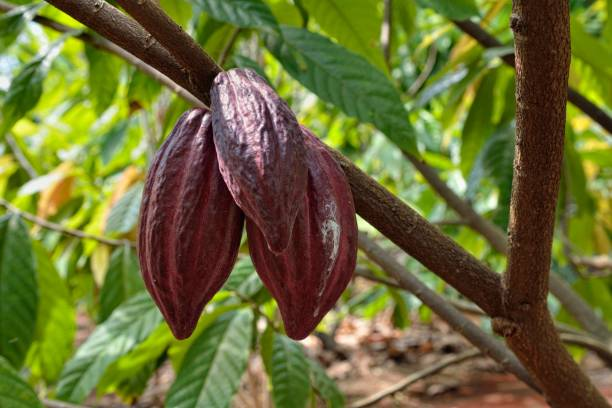 